<a href="https://colab.research.google.com/github/adibhosn/Machine_learning_lab/blob/main/Decision_tree_%26_Radom_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Trees**
Decision Trees are intuitive, tree-like models that split data into branches based on feature values to make predictions. They’re easy to interpret and visualize, making them a popular choice for both classification and regression tasks.

### How it works:
1. The algorithm starts at the **root node** and selects the feature that best splits the data (using metrics like **Gini impurity** or **information gain**).
2. It repeats this process recursively for each subset of data, creating branches and nodes.
3. The splitting stops when a stopping criterion is met, such as reaching the maximum tree depth or having too few samples in a node.
4. To make a prediction, the model traverses the tree from the root to a leaf node.

### When to use it:
Decision Trees are ideal when you need an **interpretable model**. They’re used in applications like customer segmentation, fraud detection, and medical diagnosis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_bc = pd.read_csv('/content/drive/MyDrive/Curso_estatística_Python/risco_credito.csv')
df_bc

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


# Importing the pre-processed data from the previous notebook.

In [ ]:
import pickle

with open('/content/drive/MyDrive/Curso_estatística_Python/risco_credito.pkl', 'rb') as f:
    X_risk, y_risk = pickle.load(f)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

risco_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
risco_tree.fit(X_risk, y_risk)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
risco_tree.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

# Visualization

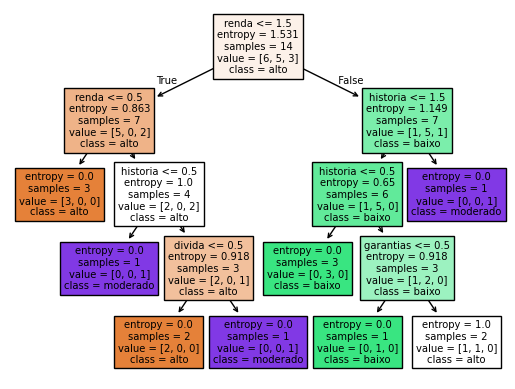

In [ ]:
from sklearn import tree

atributes = ['historia', 'divida', 'garantias', 'renda']
tree.plot_tree(risco_tree,feature_names = atributes, class_names=risco_tree.classes_, filled=True);

In [ ]:
previsao = risco_tree.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'alto'], dtype=object)

# Another DF (census)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso_estatística_Python/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
import pickle

with open('/content/drive/MyDrive/Curso_estatística_Python/census_x_train.pkl', 'rb') as f:
    X_train_census, X_test_census, y_train_census, y_test_census = pickle.load(f)



In [ ]:
X_train_census.shape, y_train_census.shape

((26048, 108), (26048,))

In [ ]:
X_test_census.shape, y_test_census.shape

((6513, 108), (6513,))

In [ ]:
tree_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_census.fit(X_train_census, y_train_census)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsao_census = tree_census.predict(X_test_census)
previsao_census

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test_census, previsao_census)
print(f'accuracy = {accuracy}')

accuracy = 0.8197451251343467


# I achieved better accuracy than in the Naive Bayes algorithm

In [ ]:
report = classification_report(y_test_census, previsao_census)
print(f'classification report = {report}')

classification report =               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4945
           1       0.63      0.62      0.63      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513



In [ ]:
matrix = confusion_matrix(y_test_census, previsao_census)
print(f'acertos = {matrix[0][0]}', end = '|')
print(f'erros = {matrix[0][1]}')
print(f'erros = {matrix[1][0]}', end = '|')
print(f'acertos = {matrix[1][1]}')



acertos = 4359|erros = 586
erros = 588|acertos = 980


In [ ]:
matrix

array([[4359,  586],
       [ 588,  980]])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
forest.fit(X_train_census, y_train_census)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
previsoes_forest = forest.predict(X_test_census)
previsoes_forest

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
y_test_census.values

array([0, 0, 1, ..., 1, 0, 0])

# I achieved a 4% higher accuracy using Random Forest compared to Decision Tree.

In [ ]:
accuracy = accuracy_score(y_test_census, previsoes_forest)
print(f'accuracy = {accuracy}')

accuracy = 0.8567480423767849


In [ ]:
matrix_random = confusion_matrix(y_test_census, previsoes_forest)
print(f'acertos = {matrix_random[0][0]}', end = '|')
print(f'erros = {matrix_random[0][1]}')
print(f'erros = {matrix_random[1][0]}', end = '|')
print(f'acertos = {matrix_random[1][1]}')

acertos = 4582|erros = 363
erros = 570|acertos = 998
